深度学习基础1

本节内容主要为深度学习的基础知识

编码过程主要使用numpy作为基础，并对应tensorflow以及pytorch


参考书目：

深度学习入门：基于python的理论与实现

深度学习的数学


1.感知机


感知机是神经网络的的起源算法。学习感知机是深度学习中重要的思想。



### 激活函数

[-5 -4 -3 -2 -1  0  1  2  3  4]
[0.00669285 0.01798621 0.04742587 0.11920292 0.26894142 0.5
 0.73105858 0.88079708 0.95257413 0.98201379]


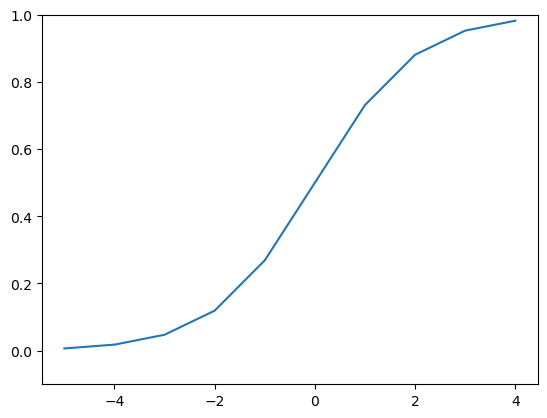

In [1]:
import numpy as np 
import matplotlib.pylab as plt 
def sigmoid(x:np.array)->np.array:
    return 1/(1+np.exp(-x))


x=np.arange(-5,5,1)
print(x)
y=sigmoid(x)
print(y)
plt.ylim(-0.1,1)
plt.plot(x,y)

通过numpy构建一个基础的神经网络


$$A^1=XW^1+B^1$$
其中$W^1$为第0层权重系数矩阵，$B^1$为第0层的偏置参数矩阵，$A^1$为第0层计算得到的网络节点结果,$x$为最初的神经网络结点

在此设初始节点有两个，第一层网络有三个节点，对应的变量矩阵与系数矩阵形状为
$X_{(1 \times 2)}$初始节点为两个
$W_{(2 \times 3)}$系数矩阵行与初始节点相同，列与第一层节点书目（3个）相同
$A_{3 \times 1}$

$$\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\\7 & 8 & 9\end{bmatrix} \cdot \begin{bmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{bmatrix} = \begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\\7 & 8 & 9\end{bmatrix} \end{equation}
$$


In [28]:
import numpy as np  
x=np.array([1,0.5])#初始网络有两个节点，并赋值
W1=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])#对应第二层网络
B1=np.array([0.1,0.2,0.3])#
A1=x@W1+B1
A1

array([0.3, 0.7, 1.1])

在以上网络基本结构基础上，加入激活函数$h()$通过激活函数，第1层第n个节点结果$a_n$代入运算，得到该节点计算后的新的数值，该数值又作为下一层节点计算的输入节点。

In [29]:
Z1=sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

第2层节点设为2个节点，计算方式与第一层相同，即：
$$A^2=Z^1W^2+B^2$$
$$$$
其中$W^2$形状为（3，2）对应第一层Z1三个节点，第二层两个节点
$B^2$对应第二层两个节点

In [30]:
W2=np.array([0.1,0.4,0.2,0.5,0.3,0.6])
W2=W2.reshape(3,2)
B2=np.array([0.1,0.2])
A2=Z1@W2+B2
A2

array([0.51615984, 1.21402696])

同样，第二层输入A2，通过激活函数$h()$，得到对应的两个节点输出Z2
$$Z^2=h(A^2)$$

In [31]:
Z2=sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

最终的输出层为两个节点，但其激活函数有所差别，不使用sigmaod，而是使用恒等函数$i()$
即最终输出的节点Y只与B3偏置矩阵相加，而不经过激活函数计算
$$A^3=Z^2W^3+B^3$$
$$Y=i(A^3)$$

---
输出层的激活函数需根据最终求解的问题来确定：
* 回归问题 —— 一般使用恒等函数
* 二分类问题 —— 可以使用sigmoid函数
* 多分类问题 ——  可以使用softmax函数

In [32]:
def identify(a):
    return a
W3=np.array([[0.1,0.3],[0.2,0.4]])
B3=np.array([0.1,0.2])
A3=Z2@W3+B3
Y=identify(A3)
Y

array([0.31682708, 0.69627909])

综合以上步骤，定义简单3层神经网络类，实现神经网络的计算

类包括基本的

In [23]:
class SimpleNero():
    """_summary_
    
    """
    def __init__(self,x:np.array) -> None:
        self.x=x
        self.network={}
        # 定义3层网络中各个网络参数
        W1=np.array([[0.1,0.2,0.8],[0.2,0.1,0.8]])#对应第一层网络
        B1=np.array([0.2,0.2,0.3])#
        W2=np.array([0.2,0.1,0.5,0.2,0.7,0.8])
        W2=W2.reshape(3,2)
        B2=np.array([0.3,0.5])
        W3=np.array([[0.3,0.2],[0.1,0.4]])
        B3=np.array([0.2,0.3])
        self.network['w1']=W1
        self.network['b1']=B1
        self.network['w2']=W2
        self.network['b2']=B2
        self.network['w3']=W3
        self.network['b3']=B3
    def forword(self):
        print("第一层计算")
        A1=self.x@self.network['w1']+self.network['b1']
  
        Z1=sigmoid(A1)
        A2=Z1@self.network['w2']+self.network['b2']
        Z2=sigmoid(A2)
        A3=Z2@self.network['w3']+self.network['b3']
        y=identify(A3)
        return Y
if __name__=='__main__':
    x=np.array([0.5,0.2])#初始网络有两个节点，并赋值
    simpleNet=SimpleNero(x=x)
    y=simpleNet.forword()
    print(y)
        
        

第一层计算
[0.50781228 0.76345024]


## 输出层激活函数: 恒等函数、 softmax 与 sigmoid函数对比
注意在此讨论的激活函数作用区间都是在层的内部，而不是两个层之间，两个层之间的关系依然是
$$\delta():A_k=Z_{k-1}\times W_k +B_k$$
$$y_k=a_k$$
$$y_k=1/(1+e^{-a_k})$$
$$y_k = exp(a_k) \over \sum_{i=1}^n exp(a_i)$$
----
softmax函数特征

* 在网络最后一层，输出层使用softmax得到多分类的结果，其综合概率为1
* softmax函数会出现计算数值过大，为此解决方法是分子分母中对应e参数（节点值）都减去对应常数，一般会使用输入信号最大值。
---
The **softmax** function or **normalized exponential function** is used for the output activation function of a multi-class classifiers. The softmax function is the multinomial generalization of the sigmoid or logistic function. The probability of each class $j$ is written as: 

$$\sigma(z_j) = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

The normalization $\sum_{k=1}^K e^{z_k}$ ensures the sum of probabilities for all classes add to $1.0$. The class selected by the classifier is the class with the largest value of $\sigma(z_j)$.

In [17]:
def softmax(a:np.array)->np.array:
    c=np.max(a)
    return np.exp(a-c)/np.sum(np.exp(a-c))
a=np.array([0.3,2.9,4])
y=softmax(a)
print(y)
print(sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


### 手写数字识别

本案例时间神经网络的“推理处理”，也称为神经网络的向前传播（forward propagation），即先不考虑学习模型问题，而是使用已经学习好的模型（参数）进行模型的推理，得到结论例如分类。

数据集Mnist

以下代码为获取mnist数据集合，并下载到当前文件夹下

In [4]:
import os 


c:\Users\tom\OneDrive\文档\GitHub\IRM_class\Deep Learning


In [ ]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

 
#dataset_dir = os.path.dirname(os.path.abspath(__file__))
dataset_dir='C:\\Users\\tomis\\OneDrive\\LUCK\\luckLab\\irm_-class-master\\IRM_class\\Deep Learning'
dataset_dir=os.path.abspath(".")
save_file = dataset_dir+ "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """ 以“（训练图像、训练标签），（测试图像、测试标签）的形式返回读入的MNIST数据”
    Parameters
    ----------
    normalize : 是否将输入图像正规化为0.0~1.0 的值，如果该参数设置为False，则输入的图像像素会保留原来的0-255。
    flatten :设置是否展开输入图像（变成一维数组），如果为Flase则输入图像为1*28*28的三维数组；若设置为Ture，则输入图像会保存为784个元素构成的一维数组
    one_hot_label : 
        one_hot_label设置是否将标签保存为ont-hote
        one-hot 表示是仅正确的标签为1，其余都为0的数组 
    Returns
    -------
    （训练图像、训练标签），（测试图像、测试标签）
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()


基于以上代码，读取MNIST数据，并拆分为训练集、测试集

In [6]:
import sys, os 
from PIL import Image
sys.path.append(os.pardir)
import pickle

def img_show(img):
    """显示图像函数

    Args:
        img (np.array): 载入的图像,数组格式
    """
    pil_img=Image.fromarray(np.uint(img))
    pil_img.show()
if __name__=="__main__":
    (x_train,t_train),(x_test,t_test)=load_mnist(flatten=True,normalize=False)
    img=x_train[0]
    label=t_train[0]
    print("训练集图像格式：",type(img))
    print("得到的训练集第一张图谱形状：",img.shape)
    img_show(img.reshape(28,28))#将得到的
    print(x_train.shape)
    print(t_train)
    print(x_test.shape)


训练集图像格式： <class 'numpy.ndarray'>
得到的训练集第一张图谱形状： (784,)
(60000, 784)
[5 0 4 ... 5 6 8]
(10000, 784)


在以上载入图像，训练集测试集划分基础上实现向前foward
不训练数据，而是调用已训练好的参数（使用python pickle方法调用），并进行模型的准确度检验。

包括数据载入load_data()，网络初始化__init__()，预测predict()

In [ ]:
import Function as f
import pickle
class MinitNet():
    """自定义读取Minitst数据训练模型
    """
    def load_data(self):
        (x_train,t_train),(x_test,t_test)=load_mnist(flatten=True,normalize=True)
        return x_test,t_test

    def __init__(self):
        with open("sample_weight.pkl","rb") as f:
            self.network=pickle.load(f)
        print("读取已训练模型参数,保存在sample_weight.pkl中")
        print(type(self.network))
       
    
    def forwod(self,x:np.array)->int:
         
        print("调用预训练参数，三层网络结构")
        W1=self.network['W1']
        W2=self.network['W2']
        W3=self.network['W3']
        b1=self.network['b1']
        b2=self.network['b2']
        b3=self.network['b3']
        print("输入层的结构",x.shape)
        print("第一层网络系数矩阵形状：",W1.shape)
        print("第一层网络偏置矩阵形状：",b1.shape)
        print("第二层网络系数矩阵形状：",W2.shape)
        print("第二层网络偏置矩阵形状：",b2.shape)
        print("第三层网络系数矩阵形状：",W3.shape)
        print("第三层网络偏置矩阵形状：",b3.shape)
        print("开始网络计算")
        print("输入层网络节点书目",x.shape)
        A1=x@W1+b1
        print("第一层网络输入节点",A1.shape)
        Z1=f.sigmoid(A1)
        print("通过sigmoid函数计算节点内部输出结果，并作为第二层输入")
        A2=Z1@W2+b2
        print("通过sigmoid函数计算节点内部输出结果，并作为第三层输入")
        Z2=f.sigmoid(A2)
        A3=Z2@W3+b3 
        print("通过softmax函数计算节点计算输出层结果，并通过np.argmax函数返回最大概率对应项")
        Y=f.softmax(A3)
        print("预测结果矩阵形状",Y.shape)
        print("预测结果矩阵维度",Y.ndim)
        if Y.ndim==1:
            return np.argmax(Y)
        elif Y.ndim==2:
            return np.argmax(Y,axis=1)
        #print(np.argmax(Y,axis=1))
        #rs=np.argmax(Y)
        #print("预测结果矩阵形状",Y.shape,'通过max得到概率最大的图片对应数字分类结果')
        return Y               
if __name__=="__main__":
    miniNet=MinitNet()
    x_test,t_test=miniNet.load_data()
    x23=x_test[22]
    t23=t_test[22]
    rs=miniNet.forwod(x23)
    print("预测结果：",rs)
    print("真实值：",t23)
    print("预测结果是否正确",rs==t23)

批量处理

以上代码每次只处理（forward）一个图像即一个一维数组，但可以一次性处理多个数组

这种打包方式的输入数据称为批（batch）。就如一捆数据打包输入函数处理。

在神经网络运算中，当数据传输称为瓶颈，批处理可以减轻数据总线负荷。批处理一次计算大型数组要比分开逐步计算各个小型数组速度更快。

In [ ]:
x,t=miniNet.load_data()

print("数据格式为：",x.shape,"其中图片数目：",x.shape[0],"每个图片为1维度数组，数组大小：",x.shape[1])
print("标签数组格式为:",t.shape)
batch_size=100
j=1
acc=0
for i in range(0,len(x),batch_size):
    print("第",j,"次载入")
    print("每批次载入：",batch_size,"张图片")
    print("本次载入",i,"到",i+batch_size,"张图片")
    j=j+1
    
    y=miniNet.forwod(x[i:i+batch_size,:])
    y_pred=y#np.argmax(y,axis=1)
    print(y_pred)
    acc+=np.sum(y_pred==t[i:i+batch_size])
print("准确率为：",acc/len(x))
 

# 神经网络的学习

为了优化神经网络，使得模型能够更好第预测，需要对网络进行学习

1. 不同于人工学习、机器学习，神经网络学习是一种端到端的学习方式。
> 机器学习，神经网络学习首先需要将输入信息（例如图像、文本）进行预处理，变为向量等机器可以理解方式，而后通过算法（聚类、分类算法）等进行学习。整个步骤中，如果将原始信息变为向量表达，需要人工干预。
> 深度学习与机器学习不同之处在于，原始信息变为向量这个过程也是机器进行学习确定，从而使得模型更不需要人工干预，且可以复用不同场景。

2. 训练集与测试集
与回归等学习相同，深度学习为了验证准确度，避免模型过拟合，也分为train与test两个集合

3. 损失函数

与回归相同，深度学习需要通过损失函数来调优参数，包括通过求偏导，对参数（系数参数W，偏参B调优）最终实现损失函数值（误差）最小，从而模型最优化。

损失函数有多个，常用包括均方误差（mean squared error）；交叉熵误差函数(cross entropy error)
 
$$e_{mean}=\frac{1}{2} \times {\sum_{n=1}^N (y_n-y_n^{'})^2}$$
$$e_{cross}=-\sum_{n=1}^N (y_n \times log(y_n^{'}))$$
---
在此注意的是，在进行分类运算时，如果用one-hot表示方法，那么均方误差法求得是

y=[1,0,0,0]-y_p=[0.7,0.2,0.1]的对应差的平方/2值
但使用交叉熵方法时候，由于非真值标签为0，得到的误差实际就是为真值时候对应概率（0.7）的log值取负值：

$$e_{cross}=-\sum_{n=1}^N (1 \times log(0.7))$$

----
误差函数确定后，带入求$y^{'}$公式，例如在进行多分类运算时，最后输出层计算公式为softmax，则将相应公式带回误差计算中。
 
$$e_{cross}=-\sum_{n=1}^N (y_i \times log(y_i^{'}))...(1)$$
$$y_i^{'} = {exp(x_i) \over \sum_{j=1}^n exp(x_j)}...(2)$$

此处为了统一，相关符号进行了改变，以上首先通过公式(2），通过第i个x节点输入数据，以及其他n-1个节点输入数据，求得该节点通过softmax函数计算结果。将结果带入公式（1）与实际值对比，得到误差。注意输入的是数组，输出也是数组（概率值）


In [6]:
import numpy as np 
def mean_sqared_e(y,y_p):
    """均方误差函数

    Args:
        y (_type_): 真值
        y_p (_type_):预测值
    Returns:
        _type_: _description_
    """
    e=(np.sum((y-y_p)**2))/2
    return e
def cross_entropy_e(y,y_p):
    """交叉熵误差

    Args:
        y (_type_): 真值
        y_p (_type_):预测值
    """
    delta=1e-7# 为了防止计算结果溢出
    e=-np.sum(y*np.log(y_p+delta))
    return e
#验证自编辑函数是否正确
t=np.array([0,0,1,0,0,0,0,0,0,0])
y=np.array([0.1,0.05,0.6,0,0.05,0.1,0,0.1,0,0])
e1=cross_entropy_e(t,y)
e1
e2=mean_sqared_e(t,y)
e2

0.09750000000000003

### mini-batch问题

首先，不论是回归问题，深度学习问题,都是通过训练集中，整体预测值与真实值的误差最小化（微分实现参数调优），上面的代码载入的是一个数据集（一张图片(784,)一维向量），实际中应该载入所有训练集数据，例如6000张图，那么向量应该是(6000,784)。

----
首先将之前的误差函数（交叉熵误差）进行扩展，得到是所有训练集的误差值和的均值
$$e_{sum_cross}=-\sum_{n=1}^N (y_n \times log(y_n^{'}))$$
 
例如假设现有（n=6000）张训练图片，每个图片最终有（k=10）个可能结果。那么当只是一个图载入时候，得到的交叉熵结果为
$$e_{cross}=-\sum_{k=1}^{k=10} (y_k \times log(y_k^{'}))$$
得到10个真正label与计算值$y_{'}$计算结果。只不过这里由于使用了one-hot,导致除了真值其他对应值都是0


$$e_{cross}=-(\sum_{n=1}^{n=6000}\sum_{k=1}^{k=10} (y_{nk} \times log(y_{nk}^{'})))/n$$

在单个数据载入求误差基础上，将所有数据（图片）误差加重并平均就得到训练集总体误差

但为了由于此时数据量较大，增加了计算压力，此时可以基于统计中的抽样方式，通过每次抽样一定的数据得到训练结果。也就是设定mini-batch=抽样100


In [ ]:
import numpy as np 
import data
#    （训练图像、训练标签），（测试图像、测试标签） 
(train_data,train_label),(test_data,test_label)=data.load_mnist()
train_size=train_data.shape[0]
print("测试集数量：",train_size)
##### 随机抽取其中100个作为误差项计算
batch_size=100# 抽取数目
random_index=np.random.choice(train_size,batch_size)
print("随机index：",random_index)
train_data_batch=train_data[random_index]
train_label_batch=train_label[random_index]


通过得到随机index获取抽样数据框。mini——bach=100

In [ ]:
print(type(train_data))
print(train_data.shape)
print(train_data.shape[0]*train_data.shape[1])
print(train_data.size)# size是数组中所有数据项数目
print(train_data[0].ndim)
print(train_data[0].shape)
data=train_data[0].reshape(1,train_data[0].size)
print(data.shape)
print(data)

In [9]:
history

def cross_entropy_e(y,y_p):
    """更新之前交叉熵方法，扩展为多个测试集相加后平均情况，但也可以接受单个测试数据

    Args:
        y (_type_): 真值，可以是一维、二维数组，但最终计算时都必须转换为矩阵
        y_p (_type_): 预测值，可以是一维、二维数组，但最终计算时都必须转换为矩阵
    """
    delta=1e-7# 为了防止计算结果溢出
    n=y.shape[0]
    e=-np.sum(np.sum(y*np.log(y_p+delta),axis=1),axis=0)/n
def cross_entropy_e(y,y_p):
    """更新之前交叉熵方法，扩展为多个测试集相加后平均情况，但也可以接受单个测试数据

    Args:
        y (_type_): 真值，可以是一维、二维数组，但最终计算时都必须转换为矩阵
        y_p (_type_): 预测值，可以是一维、二维数组，但最终计算时都必须转换为矩阵
    """
    delta=1e-7# 为了防止计算结果溢出
    n=y.shape[0]
    e=-np.sum(np.sum(y*np.log(y_p+delta),axis=1),axis=0)/n
y=np.array([0,1,0,0])
y_p=np.array([[0.2,0.4,0.3,0.1]])
e=cross_entropy_e(y,y_p)
import numpy as  np 
def cross_entropy_e(y,y_p):
    """更新之前交叉熵方法，扩展为多个测试集相加后平均情况，但也可以接受单个测试数据

    Args:
        y (_type_): 真值，可以是一维、二维数组，但最终计算时都必须转换为矩阵
        y_p (_type_): 预测值，可以是一维、二维数组，但最终计算时都必须转换为矩阵
    """
    delta=1e-7# 为了防止计算结果溢出
    n=y.shape[0]
    e=-np.sum(np.sum(y*np.log(y_p+delta),axis=1),axis=0)/n
    ret

In [12]:
import numpy as  np 
def cross_entropy_e(y,y_p):
    """更新之前交叉熵方法，扩展为多个测试集相加后平均情况，但也可以接受单个测试数据

    Args:
        y (_type_): 真值，可以是一维、二维数组，但最终计算时都必须转换为矩阵
        y_p (_type_): 预测值，可以是一维、二维数组，但最终计算时都必须转换为矩阵
    """
    delta=1e-7# 为了防止计算结果溢出
    n=y.shape[0]
    e=-np.sum(np.sum(y*np.log(y_p+delta),axis=1),axis=0)/n
    return e
def cross_entropy_e2(y,y_p):
    """更新之前交叉熵方法，扩展为多个测试集相加后平均情况，但也可以接受单个测试数据,在此直接基于numpy.sum实现多个维度全运算

    Args:
        y (_type_): 真值，可以是一维、二维数组，但最终计算时都必须转换为矩阵
        y_p (_type_): 预测值，可以是一维、二维数组，但最终计算时都必须转换为矩阵
    """
    if y.ndim==1:#当输入为一维数组（单个数据、图片）需将其转换为二维度矩阵，以统一运算
        y=y.reshape(1,y.size)#1行，k列的矩阵
        y_p=y_p.reshape(1,y_p.size)
        
        
    delta=1e-7# 为了防止计算结果溢出
    n=y.shape[0]
    e=-np.sum(y*np.log(y_p+delta))/n
    return e
y=np.array([[0,1,0,0]])
y_p=np.array([[0.2,0.4,0.3,0.1]])
e=cross_entropy_e(y,y_p)
e2=cross_entropy_e2(y,y_p)
print(e)
print(e2)

0.9162904818741863
0.9162904818741863


为了求得误差最小值，使用微分求得最小值。
以下回顾微分基本概念以及基于numpy求微分方法

微分基本概念就是当$\Delta x$趋近于无限小时，求$x_0$点的极限
$$\lim_{x \rightarrow - \infty}(\frac{f(x_0+\Delta{x})-f(x_0)}{\Delta{x}}) $$
其中$f(x_0+\Delta{x})$为对应的y增量 $\Delta{y}$

对应函数曲线在点$x_0$切线的斜率$tan{\theta}=\Delta{y}\div \Delta{x}$

当微分在点$x_0$为0时，对用的斜率为0，切线就为一条平行线，函数$f(x)$在点$x_0$到达（局部）极大值或极小值：

以下定义微分函数，计算机中求微分函数与人类直接根据公式求导不同，是根据根据一个极小值直接计算：
> 数值微分（numerical differentiation) 利用微小的差分求导过程
> 解析性求导 (analyisc) 利用数据公式求导

In [2]:
def numerical_diff(f,x):
    """_summary_
    Args:
        f (_type_): _待求导函数公式_
        x (_type_): _对应x0点值_
    Returns:
        _type_: _description_
    """
    delta=10e-4
    print("对应极小值：",delta)
    lim_rs=(f(x+delta)-f(x))/delta
    
    return lim_rs

注意到在实际中，由于$/Delta x$这个极小值的存在，故实际的切线与通过微分得到切线有所区别。为了减少这个误差，对微分方程解析改进，计算函数$f(x)$在$(x+\Delta x)$和$(x-\Delta x)$之间的微分，称为中心差分，

而$(x+h)$和$x$之前的微分称为前向微分

In [9]:
def numerical_diff(f,x):
    """_summary_
    Args:
        f (_type_): _待求导函数公式_
        x (_type_): _对应x0点值_
    Returns:
        _type_: _description_
    """
    delta=1e-4
    print("对应极小值：",delta)
    lim_rs=(f(x+delta)-f(x-delta))/(2*delta)
    
    return lim_rs
def function_1(x):
    return 0.01*x**2+0.1*x
if __name__=="__main__":
    x=10
    lim_rs=numerical_diff(function_1,x)
    print(lim_rs)

对应极小值： 0.0001
0.2999999999986347


偏导数、方向导数、梯度

偏导数从数学定义上很好理解，即一个多元函数$f(x,y)$对其中一个参数求导时，另外一个参数视为常数，例如求$x$的偏导

$$\frac{\mathrm{d} f(x,y)}{\mathrm{d} x}$$
 时候设$y=d$常数

偏导数重要的是其几何意义，简单而言，偏导就是，
1. 首先在固定其他维度情况下(例如$y$轴变成常数；
2. 对函数$f$构成图像的求导维度（例如x维度）一个切面；
3. 求得该切面构成二维图像(z,x)轴的导数，即切线的斜率$\mathrm{tan} \theta$

偏导数几何意义：


<img src="https://images2017.cnblogs.com/blog/878138/201708/878138-20170823221940121-1109102592.png">

以下分别基于sympy与numpy求偏导
对应求导函数

$$f(x,y)=x^2+y^2$$
求偏导，以及$x=3,y=4$对应偏导值

sympy求导数方法为解析性求导，即先求导出公式，然后带入值。

numpy求导为数值求导，即通过极小$\Delta x$变化求得导数

对x的偏导：
2*x
对y的偏导：
2*y
求x偏导在（3，4）值
6.00000000000000
求y偏导在（3，4）值
8.00000000000000


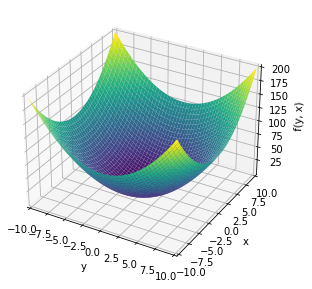

对应极小值： 0.0001
对x0求导，并计算x0=3,x1=4得到求导值： 6.00000000000378
对应极小值： 0.0001
对x1求导，并计算x0=3,x1=4得到求导值： 7.999999999999119


In [17]:
# 通过 sympy 求偏导数,可以看到，sympy是先求得偏导函数再进行相关参数带入计算，求得偏导
from sympy.plotting import *
from sympy import *
x,y=symbols("x,y")
exp=x**2+y**2
dif_x=diff(exp,x)
print("对x的偏导：")
print(dif_x)
dif_y=diff(exp,y)
print("对y的偏导：")
print(dif_y)
print("求x偏导在（3，4）值")
print(dif_x.evalf(subs={x:3,y:4}))
print("求y偏导在（3，4）值")
print(dif_y.evalf(subs={x:3,y:4}))
plot3d(exp)
# 通过numpy 求偏导
# numpy 求偏导比较粗暴，直接在定义函数中，将固定维度设为常数

def function_tmp1(x0):
    x1=4
    return x0**2+x1**2

def function_tmp2(x1):
    x0=3
    return x0**2+x1**2

if __name__=="__main__":
    x0=3
    x1=4
    print("对x0求导，并计算x0=3,x1=4得到求导值：",numerical_diff(function_tmp1,x0))
    print("对x1求导，并计算x0=3,x1=4得到求导值：",numerical_diff(function_tmp2,x1))




背景知识：
在引入梯度，以及通过梯度求得最优误差之前，需要以下背景知识：
* 全微分
> 之前的偏导数，都是设定在其他维度（自变量）为常数固定值例如$y=d$，时求函数$z=f(x,y)$在一求导变量与因变量构成平面，例如$zx$上的投影函数的导数。
> 即 $\frac{df(x,y)} {dx}}$=$f$
> 但考虑如果所有的自变量都在改变，即$x+\Delta x,y+\Delta y$此时对应的$\ Delta z$，即函数的导数如何求得？
* 方向导数


# 梯度 方向导数 全微分 
深度学习中，与微分相关的概念包括微分、导数、一元微分、偏导数

首先从基础的概念入手，即微分与导数
微分$dy$与$\Delta y$有关联，但不等同其中

 $\Delta y=f(x_0+\Delta{x})-f(x_0)$ 是函数$y=f(x)$因为$x$增加了$\Delta{x}$增加的实际值

 而（其中 $dx$和$\Delta x$等同，就是$x$的微小增量
 $dy=\frac{\partial f(x_0)}{\partial x} \times dx$ 其中 $=\frac{\partial f(x)}{\partial x}$为经过$x_0$点与$f(x)$相切的切线斜率，即$tan \theta \times dx=dy$

 由此可见，严格来说 $\Delta y$与$dy$并不完全相等，但是当 $dx$很小的时候，$\Delta y \fallingdotseq dy$

 基于这一概念，函数$f(x)$的曲线也可以用各个$x$点对应的$\frac{\partial f(x)}{\partial x}$进行模拟得到。
 
---
### 全微分：
直接给出全微分的定义，即一个多元函数$z=f(x,y)$
给定$(x_0,y_0)$求增加$\Delta x,\Delta y$后$z$的增加，即
$\Delta z=f(x_0+\Delta x,y_0+\Delta y)-f(x_0,y_0)$

而$dz =\frac{\partial f(x_0)}{\partial x} dx + \frac{\partial f(y_0)}{\partial y} dy$

同样在 $dx,dy$很小时，$dz \fallingdotseq \Delta z$

这里主要讨论全微分的几何意义，$\frac{\partial f(x_0)}{\partial x} dx $ 分别对应在x轴上通过$tan \theta \times dx$得到在z轴的对应点$(x_0+\Delta x,z_0+d zx)$;$\frac{\partial f(y_0)}{\partial y} dy $ 分别对应在x轴上通过$tan \beta\times dy$得到在z轴的对应点$(y_0+\Delta x,z_0+d zy)$，基于向量概念，这两个点的和就指向$dz$所对应的点。

--- 
### 方向导数

方向导数理解有几个要点
首先，以二元函数为例，方向导数是在 $xy$二维空间的投影，是一个有方向大小的向量，即以$L(x_0,y_0)$整个点为起点，到$Le(x_0+dx,y_0+dy)$为终点的向量$l$,该向量有大小与方向。同时其在$x$轴$y$轴的投影分别为$\Delta x,\Delta y$,其大小为$||l||$ 方向向量的模（norm）


